# Physics-Informed Neural Networks: A Mesh-Free Approach to Solving Partial Differential Equations

In [ ]:
import os
import matplotlib.pyplot as plt
import scienceplots  # optional, requires latex
plt.style.use(['science', 'grid'])

results_folder = 'results/II_PINNs'  
if not os.path.exists(results_folder):
    os.makedirs(results_folder)

# --- Font size for printing ---
plotting_factor = 3
font_factor = 3
title_font_size = 6
axes_font_size = 5
plt.rcParams.update({
    "font.size": axes_font_size*font_factor,
    "figure.titlesize": title_font_size*font_factor,
    "axes.titlesize": title_font_size*font_factor,
})


## Introduction

In [2]:
import requests
import time

def fetch_count_for_year(year, query_terms, sleep_secs=1.0):
    """
    Query OpenAlex for number of works published in given year
    whose title matches any of the query_terms.
    """
    url = "https://api.openalex.org/works"
    total = 0
    for term in query_terms:
        # Filter by publication year and title search
        params = {
            "filter": f"publication_year:{year},title.search:{term}",
            "per_page": 1  # only need meta
        }
        resp = requests.get(url, params=params)
        resp.raise_for_status()
        data = resp.json()
        count = data.get("meta", {}).get("count", 0)
        total += count
        time.sleep(sleep_secs)
    return total


# Define orthographic variants of the phrase to tolerate small differences
query_terms = [
    "Physics-Informed Neural Networks",
    "Physics Informed Neural Networks",
    "Physics-Informed Neural Network",
    "Physics Informed Neural Network",
    "PINNs",
    "Physics–Informed Neural Networks"
]
years = list(range(2018, 2026))  # up to current year (2025)
counts = []
for y in years:
    try:
        c = fetch_count_for_year(y, query_terms)
        print(f"Year {y}: {c}")
    except Exception as e:
        print(f"Error for year {y}: {e}")
        c = None
    counts.append(c)

Year 2018: 35
Year 2019: 200
Year 2020: 610
Year 2021: 1539
Year 2022: 3085
Year 2023: 5557
Year 2024: 8653
Year 2025: 8706


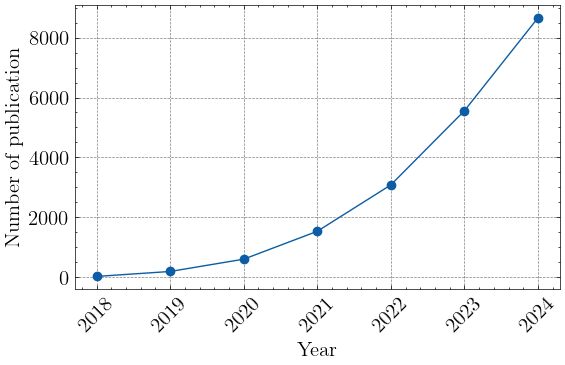

Fig width: 6.0, set it to 2.00 < 6.34 (A4 with margins) in latex to have a printed font size of 6.00 for titles and 5.00 for the axis


In [3]:
# Plot the results
fig = plt.figure(figsize=(6,4))
plt.plot(years[:-1], counts[:-1], marker='o')
# plt.title("Number of publications with 'Physics-Informed Neural Networks' in title (by year)")
plt.xlabel("Year")
plt.ylabel("Number of publication")
plt.grid(True)
plt.xticks(years[:-1], rotation=45)
plt.tight_layout()
plt.show()
print(f"Fig width: {fig.get_figwidth()}, set it to {fig.get_figwidth()/font_factor:.2f} < 6.34 (A4 with margins) in latex to have a printed font size of {title_font_size:.2f} for titles and {axes_font_size:.2f} for the axis")

images_folder = os.path.join(results_folder, 'images')
if not os.path.exists(images_folder):
    os.makedirs(images_folder)
fig.savefig(os.path.join(images_folder, 'PINNs_publications_by_year.png'), dpi=300)